In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from datetime import datetime   
from pandas import Series     
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Train_data set.csv
/kaggle/input/Test Data Set.csv
/kaggle/input/sample_submission_LSeus50.csv


we need to forecast the traffic on a company for the next 7 months. You are provided with traffic data of the company since inception in the test file.

Evaluation Metric:
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

Note: Public and private split is 20:80 where first 44 days in public and next 169 days in private

In [2]:
import pandas as pd
test= pd.read_csv("../input/Test Data Set.csv")
train= pd.read_csv("../input/Train_data set.csv")
sample_submission = pd.read_csv("../input/sample_submission_LSeus50.csv")

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 2 columns):
ID          5093 non-null int64
Datetime    5093 non-null object
dtypes: int64(1), object(1)
memory usage: 79.7+ KB


In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
train.Datetime = pd.to_datetime(train.Datetime) 
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [9]:
i = 0
year=[]
day =[]
month=[]
hour=[]
day_of_week=[]

while i < train.shape[0]:
    temp = train.iloc[i,1]
    year.append(temp.year)
    month.append(temp.month)
    day.append(temp.day)
    hour.append(temp.hour)
    day_of_week.append(temp.dayofweek)
    i +=1
#train = data    
train["year"] = year
train["month"]= month
train["day of week"]= day_of_week
train["day"] = day
train["hour"]= hour
train = train.drop("ID",1)

In [10]:
train.head()

,Datetime,Count,year,month,day of week,day,hour
0,2012-08-25 00:00:00,8,2012,8,5,25,0
1,2012-08-25 01:00:00,2,2012,8,5,25,1
2,2012-08-25 02:00:00,6,2012,8,5,25,2
3,2012-08-25 03:00:00,2,2012,8,5,25,3
4,2012-08-25 04:00:00,2,2012,8,5,25,4


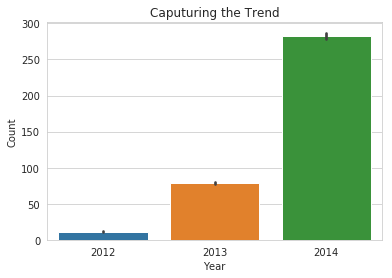

In [11]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Year'] = train.year
sns.set_style("whitegrid")
ax = sns.barplot(x="Year", y="Count", data=graph).set_title("Caputuring the Trend")

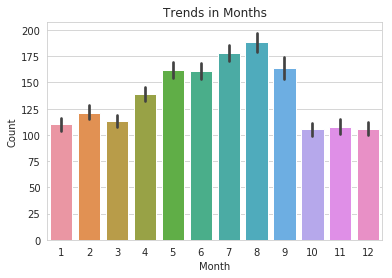

In [12]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Month'] = train.month

sns.set_style("whitegrid")
ax = sns.barplot(x="Month", y="Count", data=graph).set_title("Trends in Months")


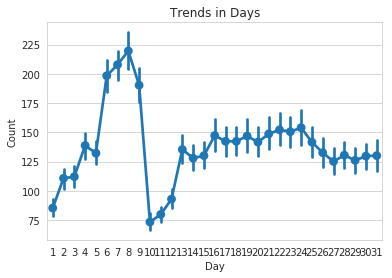

In [13]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Day'] = train.day

sns.set_style("whitegrid")
ax = sns.pointplot(x="Day", y="Count", data=graph).set_title("Trends in Days")

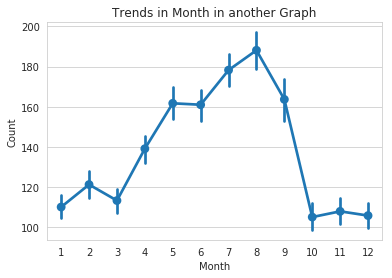

In [14]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Month'] = train.month

sns.set_style("whitegrid")
ax = sns.pointplot(x="Month", y="Count", data=graph).set_title("Trends in Month in another Graph")

In the month of October there are much traffic we can see

In [15]:
sns.set(rc={'figure.figsize':(16.7,6.27)})

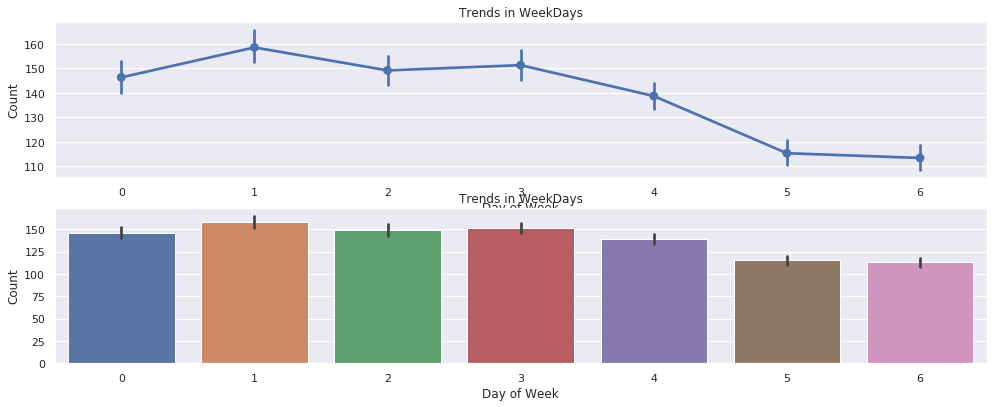

In [16]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Day of Week'] = train["day of week"]
fig, axs = plt.subplots(2,1)
sns.pointplot(x="Day of Week", y="Count", data=graph,ax=axs[0]).set_title("Trends in WeekDays")
sns.barplot(x="Day of Week", y="Count", data=graph,ax=axs[1]).set_title("Trends in WeekDays")
plt.show()

**Here we can see in the weekend there are less traffic**

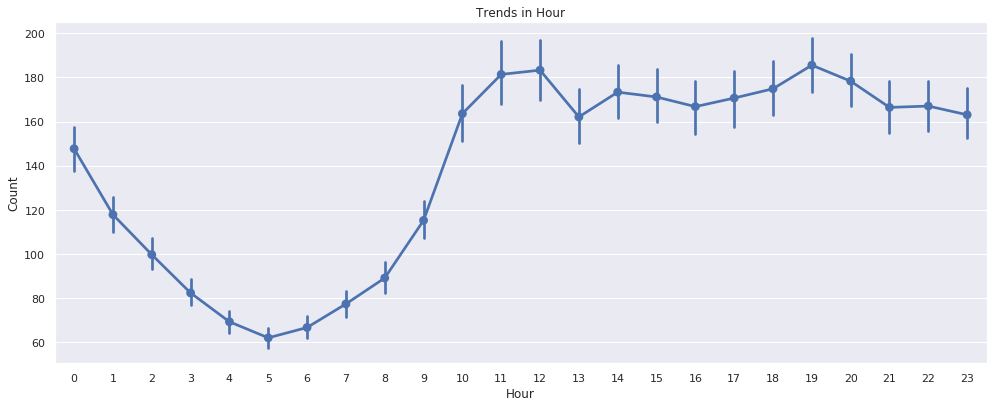

In [17]:
graph = pd.DataFrame()
graph['Count'] = train.Count
graph['Hour'] = train.hour

ax = sns.pointplot(x="Hour", y="Count", data=graph).set_title("Trends in Hour")

Here we can notice that trend is increasing with the time

In [18]:
#train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.Timestamp = pd.to_datetime(train.Datetime) 
train.index = train.Timestamp

hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()
hourly

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Count,year,month,day of week,day,hour
Datetime,,,,,,
2012-01-09 00:00:00,8.0,2012.0,1.0,0.0,9.0,0.0
2012-01-09 01:00:00,4.0,2012.0,1.0,0.0,9.0,1.0
2012-01-09 02:00:00,4.0,2012.0,1.0,0.0,9.0,2.0
2012-01-09 03:00:00,2.0,2012.0,1.0,0.0,9.0,3.0
2012-01-09 04:00:00,2.0,2012.0,1.0,0.0,9.0,4.0
...,...,...,...,...,...,...
2014-12-09 19:00:00,536.0,2014.0,12.0,1.0,9.0,19.0
2014-12-09 20:00:00,484.0,2014.0,12.0,1.0,9.0,20.0
2014-12-09 21:00:00,368.0,2014.0,12.0,1.0,9.0,21.0


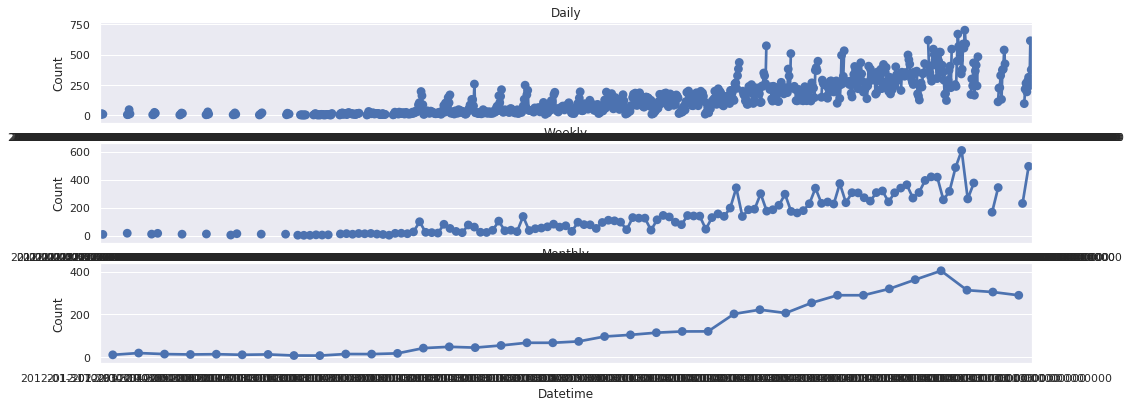

In [19]:
fig, axs = plt.subplots(3,1)

sns.set(rc={'figure.figsize':(16.7,10.27)})
# We are not going with the hourly for overfitting value
#sns.pointplot(data=hourly,y="Count",x=hourly.index,ax=axs[0]).set_title("Hourly")

sns.pointplot(data=daily,y="Count",x=daily.index,ax=axs[0]).set_title("Daily")
sns.pointplot(data=weekly,y="Count",x=weekly.index,ax=axs[1]).set_title("Weekly")
sns.pointplot(data=monthly,y="Count",x=monthly.index,ax=axs[2]).set_title("Monthly")
plt.show()

In [20]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()
train.to_csv("train_eda.csv")
train.head()

,Count,year,month,day of week,day,hour
Datetime,,,,,,
2012-01-09,4.666667,2012.0,1.0,0.0,9.0,11.5
2012-01-10,10.333333,2012.0,1.0,1.0,10.0,11.5
2012-01-11,12.666667,2012.0,1.0,2.0,11.0,11.5
2012-01-12,8.750000,2012.0,1.0,3.0,12.0,11.5
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train

In [22]:
train['Count'].head()

Datetime
2012-01-09     4.666667
2012-01-10    10.333333
2012-01-11    12.666667
2012-01-12     8.750000
2012-01-13          NaN
Freq: D, Name: Count, dtype: float64

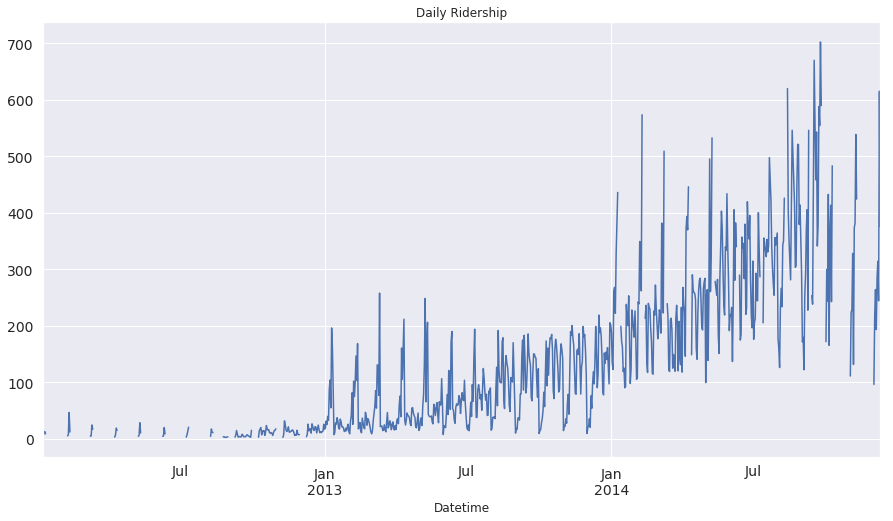

In [23]:
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
#test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

It seems like I can solve the problem in a different way ! 
Let's do this :-)

In [24]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [25]:
train= pd.read_csv("../input/Train_data set.csv")

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [28]:
train['Datetime']=pd.to_datetime(train['Datetime'],infer_datetime_format=True)
train = train.drop("ID",1)
train.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [29]:
train.isnull().sum()

Datetime    0
Count       0
dtype: int64

In [ ]:
## plot graph
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.plot(train)